In [2]:
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [188]:
n = 10

In [189]:
xvars = cp.Variable(n + 1, name='X')
xuvars = cp.Variable(n, name='Xu')
ipxvars = cp.Variable(n + 1, name='iPX')
pvars = cp.Variable(1, name='P^2')

In [190]:
K = n + 1
v1 = np.zeros(K)
v2 = np.zeros(K)
constraints = []
# for i, ipx in enumerate(ipxvars):
#     if i<K:
#         v1[i] = 1
#     else:
#         v2[i - K + 1] = 1
#     A = sp.linalg.hankel(v1, v2)
#     if i<K:
#         v1[i] = 0
#     else:
#         v2[i - K + 1] = 0
#     constraints += [ipx == cp.quad_form(xvars, A)]
for i in range(1, n + 1, 2):
    constraints += [xvars[i] == 0]
for i in range(n % 2, n, 2):
    constraints += [xuvars[i] == 0]
for i in range(0, n + 1, 2):
    constraints += [ipxvars[i] == 0]
constraints += [xvars[0] == 1]
M = sp.linalg.hankel([*xvars], [0] + [*xuvars])
M = np.vstack((M, [*ipxvars]))
M = np.hstack((M, np.array([[-1 * iPX for iPX in ipxvars] + [pvars[0]]]).T))
Mcvx = cp.Variable((n + 2, n + 2))
for i in range(n + 2):
    for j in range(n + 2):
        constraints += [Mcvx[i][j] == M[i][j]]
E = cp.Parameter(nonneg=True)
constraints += [E == pvars[0] + xvars[2] + xvars[4]]

In [191]:
prob = cp.Problem(cp.Maximize(cp.lambda_min(Mcvx)), constraints)

In [192]:
gs = np.linspace(1,3,num=100)
ts = []
for val in gs:
    E.value = val
    ts.append(prob.solve(solver=cp.CLARABEL))

/home/mainak/mtp/my-work/.venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


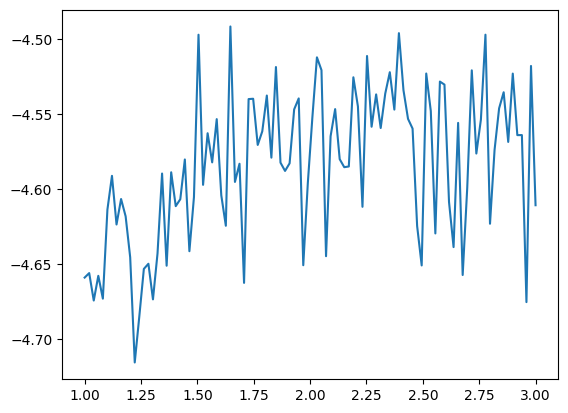

In [193]:
plt.plot(gs,np.log(np.abs(ts)))